In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'이름':['홍길동','김영희','김철수'],
                  '성적':[100,80,np.nan],
                  '등급':['A',np.nan,'B']})

df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [2]:
#결측치 확인방법
df.isna().sum()

이름    0
성적    1
등급    1
dtype: int64

In [10]:
#결측치 제거방법
df.dropna( subset = ['성적'], inplace = True)

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN


In [5]:
df.dropna()

,이름,성적,등급
0,홍길동,100.0,A


In [6]:
df.성적.sum()

180.0

In [12]:
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [13]:
df['성적']+100

0    200.0
1    180.0
2      NaN
Name: 성적, dtype: float64

In [14]:
df.성적.mean()

90.0

In [15]:
df.이름.value_counts().sum()

3

In [16]:
df.등급.value_counts().sum()

2

In [19]:
df.shape

(3, 3)

In [20]:
exam = pd.read_csv('exam.csv')

In [30]:
exam.loc[[3,8,9,15],['english']]=np.nan

In [23]:
exam.isna().sum()

id         0
nclass     0
math       0
english    4
science    0
dtype: int64

In [24]:
exam.english.mean()

81.625

In [25]:
#na값 대체 방법

exam['english'] = exam['english'].fillna(0)
exam.english.mean()

65.3

In [31]:
exam['english'] = exam['english'].fillna(81.6)

In [32]:
exam.english.mean()

81.62

In [33]:
#이상치

In [34]:
mpg = pd.read_csv('mpg.csv')
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [35]:
import seaborn as sns

<AxesSubplot:ylabel='cty'>

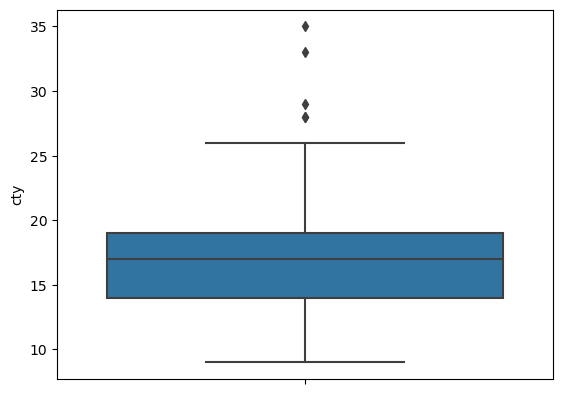

In [37]:
sns.boxplot(data=mpg,y='cty')

In [38]:
p25 = mpg['cty'].quantile(0.25)

In [39]:
p25

14.0

In [40]:
p75 = mpg['cty'].quantile(0.75)
p75

19.0

In [41]:
iqr = p75-p25
iqr

5.0

In [42]:
#하한선
p25-1.5*iqr
#상한선
p75+1.5*iqr

26.5

In [46]:
np.where((mpg['cty'] <6.5)| (mpg['cty']>26.5))

(array([ 99, 196, 212, 221, 222], dtype=int64),)

In [47]:
mpg['cty']=np.where((mpg['cty'] <6.5)| (mpg['cty']>26.5), np.nan, mpg['cty'])

In [48]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             0
fl              0
category        0
dtype: int64

In [49]:
mpg_1 = mpg.dropna()

In [50]:
mpg_1.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

<AxesSubplot:ylabel='cty'>

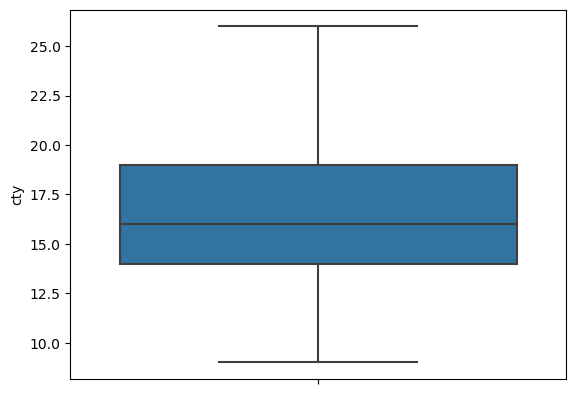

In [51]:
sns.boxplot(data=mpg_1, y='cty')

In [52]:
mpg_1.cty.mean()

16.558951965065503

In [53]:
mpg['cty']

0      18.0
1      21.0
2      20.0
3      21.0
4      16.0
       ... 
229    19.0
230    21.0
231    16.0
232    18.0
233    17.0
Name: cty, Length: 234, dtype: float64

In [54]:
mpg.loc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                 18.0
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [55]:
mpg.iloc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                 18.0
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [56]:
#loc, iloc 비교

mpg_sp=mpg.loc[[0,2,4,6,8]]
mpg_sp

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16.0,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18.0,27,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16.0,25,p,compact


In [57]:
mpg_sp.loc[4]

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                 16.0
hwy                   26
fl                     p
category         compact
Name: 4, dtype: object

In [58]:
mpg_sp.iloc[6] #현재 데이터프레임의 순서를 기반으로

IndexError: single positional indexer is out-of-bounds

In [59]:
mpg_sp.loc[6]

manufacturer        audi
model                 a4
displ                3.1
year                2008
cyl                    6
trans           auto(av)
drv                    f
cty                 18.0
hwy                   27
fl                     p
category         compact
Name: 6, dtype: object

In [61]:
for i in range(10):
    print(mpg.loc[i])

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                 18.0
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object
manufacturer          audi
model                   a4
displ                  1.8
year                  1999
cyl                      4
trans           manual(m5)
drv                      f
cty                   21.0
hwy                     29
fl                       p
category           compact
Name: 1, dtype: object
manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                   20.0
hwy                     31
fl                       p
category           compact
Name: 2, dtype: object
manufacturer        audi
model                 a4
displ       